In [9]:
#IMDB==MOVIES RATING DATA

In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
imdb=pd.read_csv("/content/imdb_data.csv")

In [15]:
imdb

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021",Adam Robitel


In [16]:
#lets check the data is load or not,check first 5 rows.

In [17]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [18]:
#basic information about datset

In [19]:
imdb.info()  # to check the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


# INSIGHTS
-- the dataset contain 3348 rows and 12 columns

--there are 6 object data type,4 integers and 2 float columns.

-- is adult column showing integer,we need to convert this yes and no format to analyze the data properly.

-- release data columns is an object,which should be convert to date time format or we seperate the data ,year and month for better analysis.

In [20]:
#lets check for the missing values.

In [21]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


INSIGHTS
-- gross(51 missing values)

-- gross represents total earning of a movies missing values may indicates that data was unavailable or the movie is underperformeed.

--possible solution : 1)missing values replace with mean or median
                      2)drop rows with missing values-51 rows will be dropped from the dataset.
                      3)if budget is availabl,then we estimate the gross using a median.

  -- missing dates--incomplete record.

  --possible solution--drop the rows.
  

In [22]:
# lets replace the missing values of gross with KNN imputation. ( knn is a part of machine learning )

THEORY :----
 KNN means taking  a nearest values

 -- if suppose we have two data so knn will take the nearest values of them.

In [23]:
# import the libraries for KNN

In [24]:
from sklearn.impute import KNNImputer

In [25]:
imputer=KNNImputer(n_neighbors=5)   # we can change the neghbour number

In [26]:
imdb[["budget","gross"]]=imputer.fit_transform(imdb[["budget","gross"]])

In [27]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [28]:
#drop the release date rows

In [29]:
imdb=imdb.dropna(subset=["release_date"]) #dropna =na is null value , subset =use for check na values and drop rows ,(not the entire column)

In [30]:
imdb.shape

(3343, 12)

# insights
-- after succesfullly removing the null values we have clean dataset.

-- total 3343 rows and 12 columns.

-- so lets start to do

***## EXPLORATORY DATA ANALYSIS (EDA) :---- ***

**QUE1) Lets find out how many unique movies are in the dataset?**


In [31]:
imdb["id"].unique()   # unique=checking unique data

array(['tt0035423', 'tt0065421', 'tt0065938', ..., 'tt9784798',
       'tt9844522', 'tt9893250'], dtype=object)

# INSIGHTS

--We have 3343 unique movies so that mean we do not have any duplicated values in the dataset.

**QUE 2) What is the overall distribution of movies runtimes ? ( #runtime=hours of the movie ......)**

Text(0.5, 1.0, 'distribution of movie runtime')

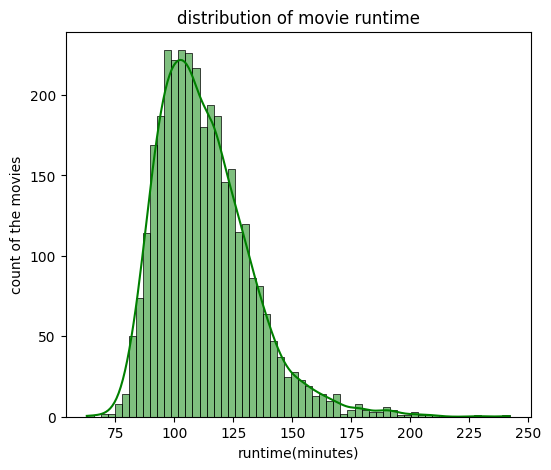

In [35]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["runtimeMinutes"],bins=60,kde=True,color="green") #kde=show the skew on the graph
plt.xlabel("runtime(minutes)")
plt.ylabel("count of the movies")
plt.title("distribution of movie runtime")

#INSIGHTS

--as we see the distribution ,it seems like normal distribution ,but lets check for the outliers also.



In [37]:
#draw the box plot

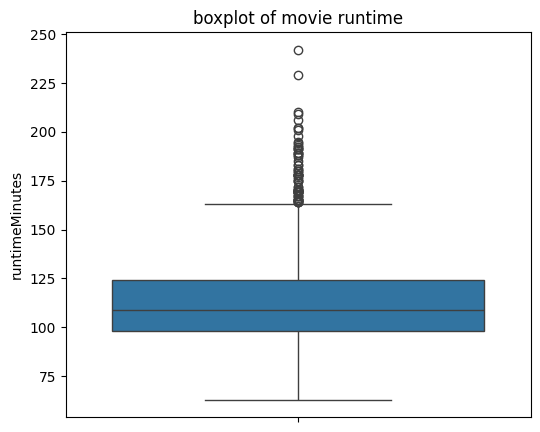

In [39]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["runtimeMinutes"])
plt.title("boxplot of movie runtime")
plt.savefig('runtime.jpg',dpi=300)  #savefig=if we want to share the plot with manager at that time we use the savefig cmmand.

**QUE 3) How many movies are marked as"adult"(isadult=1) vs non-adult(isadult=0)**
      #**[isadult=below 18 ]**

In [41]:
imdb.head(2)  #head=checking data as sample.

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman


In [42]:
imdb["isAdult"].unique()

array([0])

#INSIGHTS

-as we can see we have only one category in adult section,that mean all movies is only for adult so for better analysis ,we drop the column.

In [53]:
imdb.drop(columns=['isAdult'],inplace=True)  #drop:drop the column #inplace=for delete permntly

KeyError: "['isAdult'] not found in axis"

In [54]:
imdb.isnull().sum() #isnull().sum()=for checking the data that isadult delted or not

,0
id,0
primaryTitle,0
originalTitle,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0
release_date,0


**QUE 4)What are the top 10 most common movie genres? (generes=movie category)**

In [56]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [57]:
#as we check,in genres ,we have more than one category like ,comedy,fantacy and remance so we need to seprate the category

In [58]:
genres_list=imdb["genres"].str.split(",").explode()    #str=its a catefory form , #split=want to split(divide with comma),explode=and explode the data

In [59]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [63]:
genres_count=genres_list.value_counts() #value_counts= used for how many values/number/data in one category

In [64]:
genres_count

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


In [65]:
#we want top 10 movies

In [66]:
genres_count.head(10)  #head=top 10 data from beginning

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


In [67]:
#draw bar plot

<ipython-input-70-d370ea2feed2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.index,y=genres_count.values,palette="Set1")


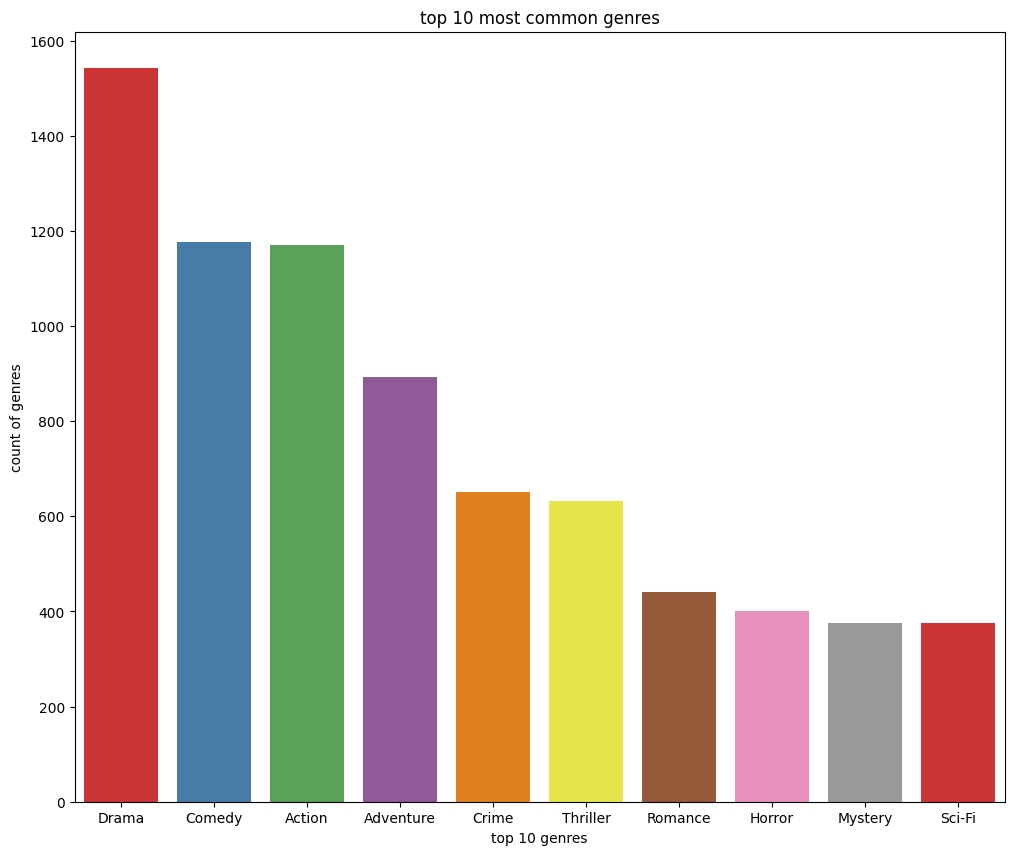

In [70]:
plt.figure(figsize=(12,10))
sns.barplot(x=genres_count.index,y=genres_count.values,palette="Set1")
plt.xlabel('top 10 genres')
plt.ylabel("count of genres")
plt.title("top 10 most common genres")
plt.savefig("top 10 movies",dpi=400)

#INSIGHTS

-- drama is the most dominant genre with 1542 movies.

--comedy and action are almost equal ~1170.

-- advantures,crime and thriller are strong contenders.

-- romance,horror ,mystry and si-fi are mid tier genres.